In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df= pd.read_csv('/content/Mall_Customers.csv')

Getting info of data and preprocessing


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.columns = df.columns.str.replace('[, ]', '')
df.head()

<ipython-input-5-923fad2467f8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[, ]', '')


,CustomerID,Gender,Age,AnnualIncome(k$),SpendingScore(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull()

,CustomerID,Gender,Age,AnnualIncome(k$),SpendingScore(1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [7]:
null_count= df.isnull().sum()

In [8]:
null_count

CustomerID              0
Gender                  0
Age                     0
AnnualIncome(k$)        0
SpendingScore(1-100)    0
dtype: int64

In [9]:
gender_count= df['Gender'].value_counts()
print(gender_count)

Female    112
Male       88
Name: Gender, dtype: int64


Text(0, 0.5, 'Count')

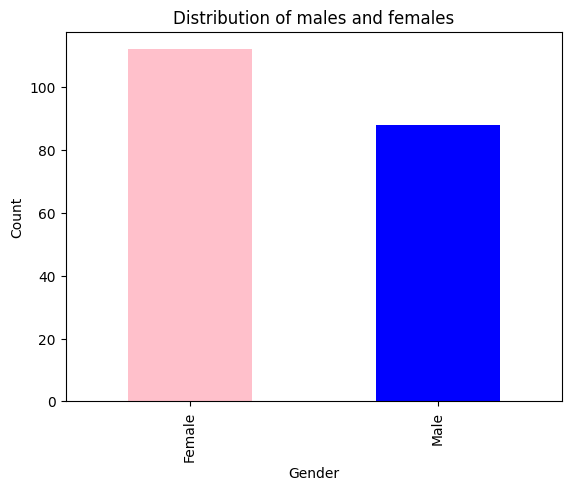

In [10]:
gender_count.plot(kind='bar', color=['pink','blue'])
plt.title('Distribution of males and females')
plt.xlabel('Gender')
plt.ylabel('Count')

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome(k$)',
       'SpendingScore(1-100)'],
      dtype='object')

In [12]:
males_data = df[df['Gender'] == 'Male'][['AnnualIncome(k$)', 'SpendingScore(1-100)']]

In [13]:
males_data

,AnnualIncome(k$),SpendingScore(1-100)
0,15,39
1,15,81
8,19,3
10,19,14
14,20,13
...,...,...
187,101,68
192,113,8
197,126,74
198,137,18


In [14]:
wcss= []
for i in range(1, 11):
  km= KMeans(n_clusters= i, init= 'k-means++', random_state= 40)
  km.fit(males_data)

  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

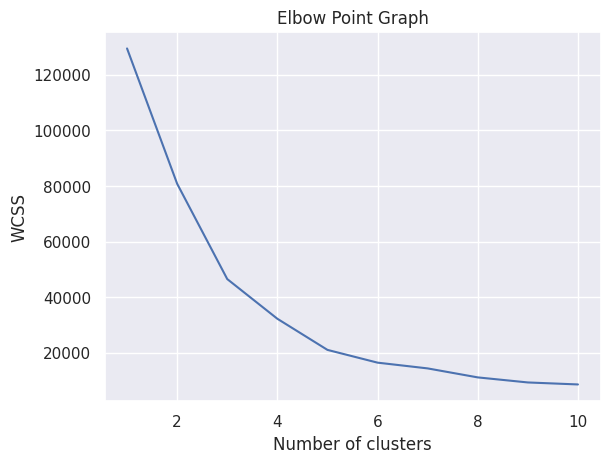

In [15]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

we observe that for males, the suitable number of clusters will be 5

In [16]:
km= KMeans(n_clusters= 5, init= 'k-means++', random_state= 40)

Y= km.fit_predict(males_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
print(Y)

[4 0 4 4 4 0 0 4 4 0 0 0 0 4 4 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 2 1
 2 1 2 1 2 1 2 1 2 2 1 2 1 2]


Visualizing all clusters

In [18]:
print(males_data.head())
print(males_data.shape)
print(males_data.info())

    AnnualIncome(k$)  SpendingScore(1-100)
0                 15                    39
1                 15                    81
8                 19                     3
10                19                    14
14                20                    13
(88, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AnnualIncome(k$)      88 non-null     int64
 1   SpendingScore(1-100)  88 non-null     int64
dtypes: int64(2)
memory usage: 2.1 KB
None


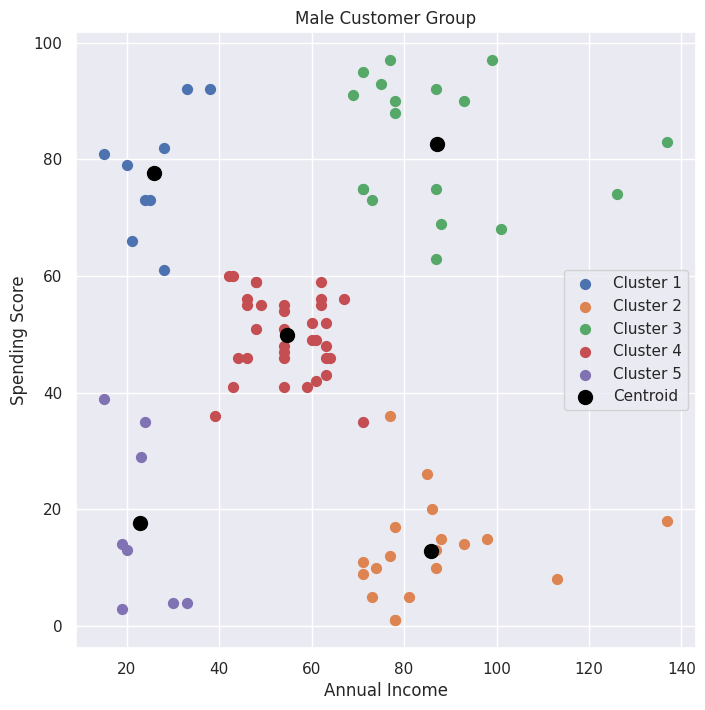

In [19]:
plt.figure(figsize=(8, 8))

for i in range(5):
    plt.scatter(males_data[Y == i]['AnnualIncome(k$)'], males_data[Y == i]['SpendingScore(1-100)'], s=50, label=f'Cluster {i + 1}')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='black', label='Centroid')

plt.title('Male Customer Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [20]:
females_data = df[df['Gender'] == 'Female'][['AnnualIncome(k$)', 'SpendingScore(1-100)']]

In [21]:
females_data

,AnnualIncome(k$),SpendingScore(1-100)
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
...,...,...
191,103,69
193,113,91
194,120,16
195,120,79


In [22]:
wcss= []
for i in range(1, 11):
  km= KMeans(n_clusters= i, init= 'k-means++', random_state= 40)
  km.fit(females_data)

  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

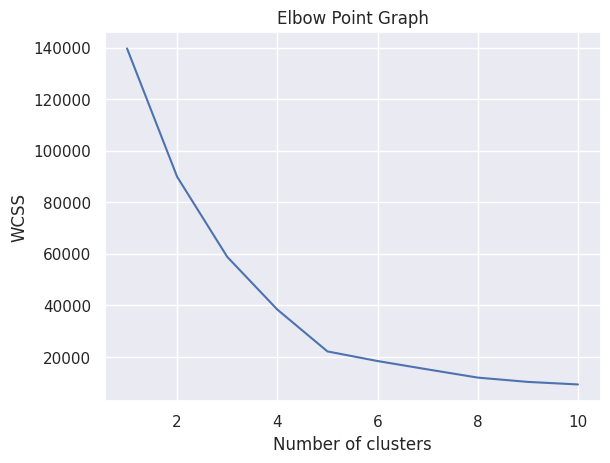

In [23]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

We observe that for women, suitable number pf clusters will be 5

In [24]:
km= KMeans(n_clusters= 5, init= 'k-means++', random_state= 40)

Y= km.fit_predict(females_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
print(Y)

[1 2 1 2 1 2 2 2 1 2 1 2 1 1 1 1 2 2 1 2 1 2 1 2 1 0 1 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 4 3 4 4 3 4 3 3 4 4 3 3 4 3 4 4 4 3 4 4 4 4 3 3 4 3 4 4 3 3 3 4 3 4 4 3 4
 3]


In [26]:
print(females_data.head())
print(females_data.shape)
print(females_data.info())

   AnnualIncome(k$)  SpendingScore(1-100)
2                16                     6
3                16                    77
4                17                    40
5                17                    76
6                18                     6
(112, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 2 to 196
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AnnualIncome(k$)      112 non-null    int64
 1   SpendingScore(1-100)  112 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB
None


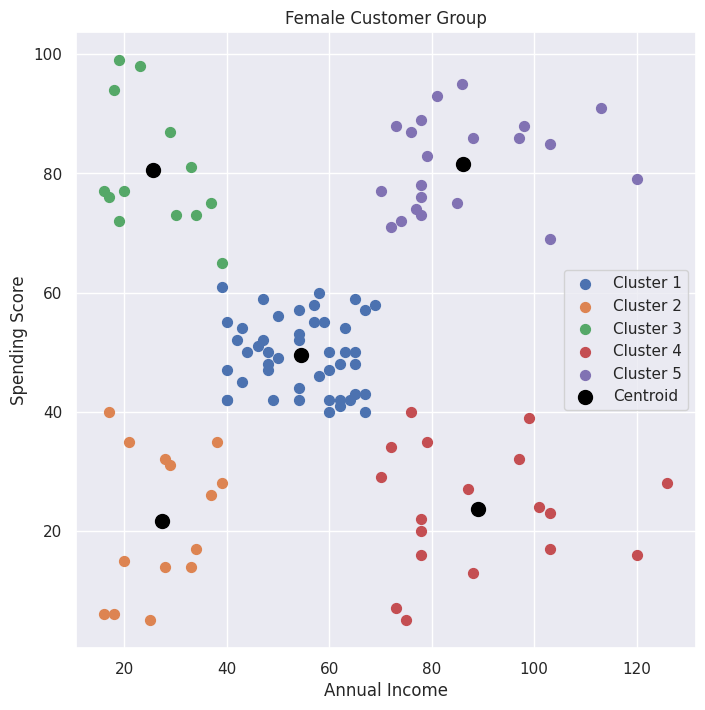

In [27]:
plt.figure(figsize=(8, 8))

for i in range(5):
    plt.scatter(females_data[Y == i]['AnnualIncome(k$)'], females_data[Y == i]['SpendingScore(1-100)'], s=50, label=f'Cluster {i + 1}')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='black', label='Centroid')

plt.title('Female Customer Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()